## 简介

我们的第一讲贡献给K-means方法,这是一种聚类方法,用于讲数据点进行划分.我们常会把它和Lloyd算法,也就是K-means方法的一种实现算法混淆.

## 历史和背后思想

K-means方法是1957年由Hugo Steinhaus提出,而"K-means"这个术语是James MacQueen在1967年第一次使用.它的思想是将数据点分到K个聚类(Clusters),使得每个点和所在聚类的中心的距离的平方和最小,也就是最小化intra-class variance,这里我们把这个intra-class variance叫做成本函数(cost function)。数学上就是
$$ \underset{S}{\arg\min} \sum\limits_{k}\sum\limits_{x_i \in S(k)}  |x_i - \mu_k| ^2 $$


其中 $ \mu_k $是各个聚类的中心，$ S(k) $是每个聚类的点的集合。

## Lloyd算法

我们以最常用的一种启发式算法(Heuristics)--Lloyd算法为例，介绍K-means方法

K-means的一般步骤:

1. 初始化K个聚类的中心,一般是在n个数据点中随机选择,n为数据集的基数
2. 根据每个数据点到每个聚类中心的距离,将它分配到最近的聚类,然后更新聚类的中心,迭代直到收敛,也就是每个点的聚类不再改变.

## 复杂度和收敛性

因为聚类一共有 $ n^K $ 种情况，每次迭代都会降低成本函数(聚类内所有点到x点的距离平方和是个二次函数,这个函数在x为聚点中心是取到最小值),所以我们总可以在有限时间内收敛.但是现实操作中,我们往往将迭代次数或者成本函数的改善用于终止函数.简单来讲,就是迭代i次终止,或者当某次迭代的结果对上次迭代的结果改善度小于某个阈值时终止.所以Lloyd的复杂度在固定迭代次数的情况下复杂度为$ O(n*K*d*i) $,其中d为数据点的维度.


K-means方法一定会收敛,但不一定收敛到全局最优点(Lloyd算法就是一种启发式算法).初始化的K个聚点中心起着决定性作用,所以人们试着改进在选取初始聚点中心的方法.比如*K-means++*算法,就是想让初始K个聚类中心相互尽量离得远.

它的具体步骤是:

1. 随机选择第一个聚点中心
2. 对数据集中剩下的每个点x,计算它和最近的聚点中心的距离$ d(x)$，将所有的$ d^2(x) $归一化求得概率$ g(x) $，这时所以剩下的点就对应$ (0,1) $上不重复的线段
3. 随机得在$ (0,1) $上取值,该值落在的x点就成为新的聚点中心
4. 重复步骤2和3,直到找到K个聚点中心
5. K-means一般步骤2

## 超参数

K-means方法中聚类的数量K,作为超参数([hyper parameters](https://baike.baidu.com/item/%E8%B6%85%E5%8F%82%E6%95%B0/3101858?fr=aladdin)),可以是提前给定的,也可以是以输入形式得到的.我们必须在训练前有一个K,一个坏的K会带来不好的结果,所以一般都会多训练几次来确定一个合适的K.

K-means方法处理球面或者超球面的数据集时表现很好,也就是数据呈现比较明显的围绕几个中心分布的情况.但面对其他分布的数据集时表现一般,并且每次运行(run)时结果不一定相同.

## 类似方法

类似的方法有K-medoid和GMM(高斯混合模型).K-medoid和K-means的区别在于一般步骤2时,我们选择聚类的中心点,也就是离中心最近的那个数据点,而不是中心.这样做的好处是减少了极端值对聚类的影响,但加大了计算复杂度,因为每次更新都要计算聚类内每个点到聚类中心的距离,不适合于大规模的数据集.至于GMM,留待第三节讲.



## 代码演示

In [1]:
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import sys
from pathlib import Path

In [4]:
p = Path(".")

In [5]:
p = p.absolute().parent

In [6]:
sys.path.insert(0,str(p))

In [7]:
import codes

In [8]:
def draw_2d(dataset,k):
    #colors = cm.rainbow(np.linspace(0, 1, k))
    Color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
    index = {j:n for n,j in enumerate(list(set([i["label"] for i in dataset])))}
    for i in dataset:
        plt.scatter(i["data"][0], i["data"][1],color=Color[index.get(i["label"])])
    plt.show()
    

In [11]:
def main():
    a = [2, 2]
    b = [1, 2]
    c = [1, 1]
    d = [0, 0]
    f = [3, 2]
    dataset = [a, b, c, d, f]
    dataset.append([1.5, 0])
    dataset.append([3, 4])
    res = codes.k_means(dataset, k=2)
    return res

In [12]:
x = main()

In [13]:
x

[{'data': [2, 2], 'label': 6},
 {'data': [1, 2], 'label': 3},
 {'data': [1, 1], 'label': 3},
 {'data': [0, 0], 'label': 3},
 {'data': [3, 2], 'label': 6},
 {'data': [1.5, 0], 'label': 3},
 {'data': [3, 4], 'label': 6}]

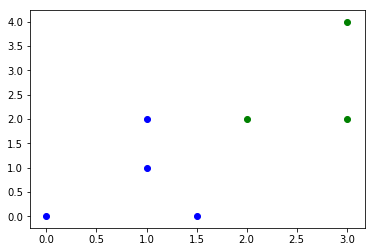

In [14]:
draw_2d(x,2)

In [15]:
a = [1,2,3]

In [16]:
b = [1.0,2.0,3.0]

In [17]:
all([float(i[0]) == float(i[1]) for i in zip(a,b)])

True

## ***使用sklearn实现k-means聚类***

`sklearn.cluster.KMeans`提供了一个用于做`k-means`聚类的接口.

In [18]:
from sklearn.cluster import KMeans
import numpy as np

In [19]:
X = np.array([[1, 2], [1, 4], [1, 0],[4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [20]:
kmeans.labels_

array([0, 0, 0, 1, 1, 1])

In [21]:
kmeans.predict([[0, 0], [4, 4]])

array([0, 1])

In [22]:
kmeans.cluster_centers_

array([[ 1.,  2.],
       [ 4.,  2.]])